In [ ]:
from google.colab import drive
import os

drive.mount('/content/drive/')

path = '/content/drive/MyDrive/Proyecto4/data/'

Mounted at /content/drive/


In [ ]:
train_audios = path + 'train'
test_audios = path + 'test'

In [ ]:
audios_drive_train = [filename for filename in os.listdir(train_audios) if filename.endswith('.wav')]
audios_drive_test = [filename for filename in os.listdir(test_audios) if filename.endswith('.wav')]

##Analisis de la data

In [ ]:
import librosa
import numpy as np
import matplotlib.pylab as plt
from IPython.display import Audio

y, sr = librosa.load(train_audios + '/' + audios_drive_train[0])
mfccs = librosa.feature.mfcc(y=y, sr=sr)
print(np.array(mfccs).shape)
print(mfccs.mean(axis = 1).shape)
feacture_vector = np.array(mfccs.mean(axis = 1))
print("Feacture Vector of the whale sound :" , feacture_vector)
Audio(data=y, rate=sr)

(20, 87)
(20,)
Feacture Vector of the whale sound : [-6.9090784e+02  2.3313016e+02  1.4117606e+02  3.7355072e+01
 -3.9016426e+01 -6.4330750e+01 -4.2950718e+01 -1.9607349e-01
  3.4300755e+01  4.3131947e+01  2.7726894e+01  3.3484571e+00
 -1.3137900e+01 -1.3944142e+01 -3.1884267e+00  8.4413319e+00
  1.2168451e+01  6.7111626e+00 -2.3069766e+00 -7.6281652e+00]


In [ ]:
from google.colab import files
import pandas as pd

filename = files.upload() #Subir train.csv
name = list(filename.keys())[0]
data = pd.read_csv(name)
data.head()

Saving train.csv to train.csv


,idx,class
0,0,NoWhale
1,1,RightWhale
2,2,NoWhale
3,3,NoWhale
4,4,NoWhale


In [ ]:
feactures = []
labels = []

for i in range(len(audios_drive_train)):
  y, sr = librosa.load(train_audios + '/' + audios_drive_train[i])
  mfccs = librosa.feature.mfcc(y=y, sr=sr)
  feacture_vector = np.array(mfccs.mean(axis = 0))
  feactures.append(feacture_vector)
  id = audios_drive_train[i].split('.')[0]
  id = int(id)
  row = data[data['idx'] == id]
  label = row['class'].values[0]
  labels.append(label)

In [ ]:
feactures_aux = np.array(feactures)
labels_aux = np.array(labels)

print(feactures_aux.shape)
print(labels_aux.shape)

(10934, 87)
(10934,)


In [ ]:
np.unique(labels_aux)

array(['NoWhale', 'RightWhale'], dtype='<U10')

In [ ]:
labels_parsed = np.where(labels_aux == 'NoWhale', 0, 1)

In [ ]:
labels_parsed = labels_parsed.reshape(-1, 1).tolist()

In [ ]:
import csv

nombre_archivo = "matriz_features_train_2.csv"

with open(nombre_archivo, mode='w', newline='') as archivo_csv:
    escritor_csv = csv.writer(archivo_csv)
    escritor_csv.writerows(feactures_aux)

In [ ]:
nombre_archivo = "vector_labels_train_2.csv"

with open(nombre_archivo, mode='w', newline='') as archivo_csv:
    escritor_csv = csv.writer(archivo_csv)
    escritor_csv.writerows(labels_parsed)

In [ ]:
def extraer_id(archivo):
    return int(archivo.split('.')[0])

audios_drive_test_ordenados = sorted(audios_drive_test, key=extraer_id)

In [ ]:
feactures = []

for i in range(len(audios_drive_test_ordenados)):
  y, sr = librosa.load(test_audios + '/' + audios_drive_test_ordenados[i])
  mfccs = librosa.feature.mfcc(y=y, sr=sr)
  feacture_vector = np.array(mfccs.mean(axis = 1))
  feactures.append(feacture_vector)

In [ ]:
nombre_archivo = "matriz_features_test_2.csv"

with open(nombre_archivo, mode='w', newline='') as archivo_csv:
    escritor_csv = csv.writer(archivo_csv)
    escritor_csv.writerows(np.array(feactures))

##Train y Test con MLP

In [1]:
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

filename = files.upload() #Subir matriz_features_train.csv
name = list(filename.keys())[0]
data_train = pd.read_csv(name, header=None)
data_train.head()

Saving matriz_features_train (2).csv to matriz_features_train (2).csv


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-690.90780,233.13016,141.17606,37.355072,-39.016426,-64.330760,-42.950718,-0.196073,34.300755,43.131947,27.726894,3.348456,-13.137901,-13.944142,-3.188426,8.441332,12.168453,6.711162,-2.306978,-7.628166
1,-620.14264,216.53568,138.27742,48.980156,-18.697283,-44.014930,-29.518972,4.284507,32.533190,40.006405,27.042700,5.870718,-9.307066,-11.358717,-3.092645,6.704843,10.249521,5.784147,-2.401366,-8.086239
2,-701.33746,227.08655,135.79889,33.556602,-41.338528,-66.855710,-48.243732,-10.436523,18.525322,23.582645,8.227665,-11.821753,-21.356007,-15.494706,-0.951583,10.623784,11.577984,3.083754,-7.059758,-11.028961
3,-635.04834,256.89246,158.76202,49.586450,-31.964933,-62.173374,-45.525097,-7.539580,22.371813,28.201185,13.022824,-7.323538,-17.134552,-11.231961,3.513916,15.135120,15.712975,6.376711,-4.776462,-9.456540
4,-675.68005,224.43768,139.78590,43.860760,-28.668608,-56.698097,-43.444770,-10.402469,16.925100,23.529175,10.722056,-8.373576,-19.647198,-17.155577,-5.305909,6.009040,9.002289,2.970206,-6.432887,-12.200844


In [2]:
filename = files.upload() #Subir vector_labels_train.csv
name = list(filename.keys())[0]
labels_train = pd.read_csv(name, header=None)
labels_train.head()

Saving vector_labels_train (1).csv to vector_labels_train (1).csv


,0
0,0
1,0
2,0
3,0
4,0


In [3]:
data_train = np.array(data_train)
labels_train = np.array(labels_train)

data_train_nom = (data_train - np.min(data_train, axis=0)) / (np.max(data_train, axis=0) - np.min(data_train, axis=0))

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_train_nom, labels_train, test_size=0.2, random_state=42)

In [5]:
y_train = y_train.flatten()
y_test = y_test.flatten()

In [6]:
import torch
from torch import nn

In [7]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

cuda:0


In [8]:
X_train_tr = torch.from_numpy(X_train).float()
y_train_tr = torch.from_numpy(y_train).long()
X_test_tr = torch.from_numpy(X_test).float()
y_test_tr = torch.from_numpy(y_test).long()

In [9]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

def matriz_confusion(y_test, y_pred, Tipo):
 matrix = confusion_matrix(y_test, y_pred)
 f2 = pd.DataFrame(matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis], index=["RightWhale", 'NoWhale'], columns=["RightWhale", 'NoWhale'])
 sns.heatmap(f2, annot=True, cbar=None, cmap="Greens")
 plt.title("Confusion Matrix "  + Tipo ), plt.tight_layout()
 plt.xlabel("Predicted")
 plt.ylabel("Real")
 plt.show()

In [10]:
class MLP(torch.nn.Module):
    def __init__(self, n):
        super(MLP, self).__init__()
        self.layer_1 = torch.nn.Sequential(
          torch.nn.Linear(20, n),
          torch.nn.ReLU(),
          torch.nn.BatchNorm1d(n),
          torch.nn.Dropout(0.2),
          torch.nn.Linear(n, n + 5),
          torch.nn.ReLU(),
          torch.nn.BatchNorm1d(n + 5),
          torch.nn.Dropout(0.2),
          torch.nn.Linear(n + 5, n + 5),
          torch.nn.ReLU(),
          torch.nn.BatchNorm1d(n + 5),
          torch.nn.Dropout(0.2),
          torch.nn.Linear(n + 5, 2)
        )

    def forward(self, x):
        output = self.layer_1(x)
        return output

In [11]:
model1 = MLP(20).to(device)
loss = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model1.parameters(), lr = 0.01)

In [15]:
def train(model, loss_f, optimizer,epochs, x_train, y_train):
  loss_lista = []
  i=0
  for epoch in range(epochs):
    x_train = x_train.to(device)
    y_train = y_train.to(device)
    y_pred = model(x_train)
    loss   = loss_f(y_pred,y_train)
    loss_lista.append(loss.cpu())
    i=i+1
    if (epoch%500==0):
      print('Epoch {}: train loss: {}'.format(epoch, loss.item()))    # Backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  return loss_lista

Epoch 0: train loss: 0.7850853204727173
Epoch 500: train loss: 0.4521775245666504


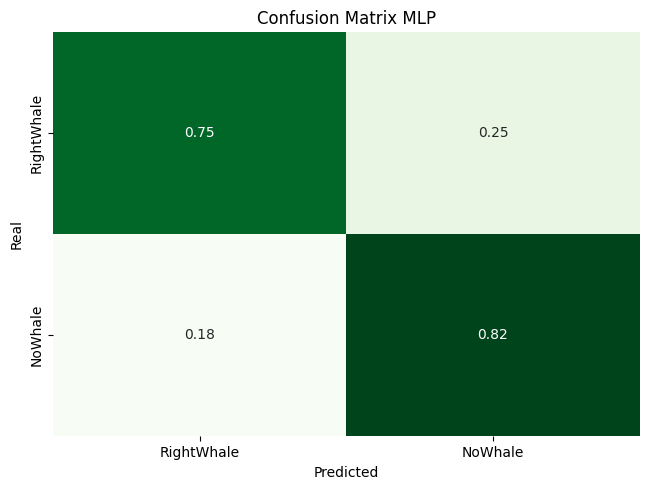

              precision    recall  f1-score   support

           0       0.80      0.75      0.78      1096
           1       0.76      0.82      0.79      1091

    accuracy                           0.78      2187
   macro avg       0.78      0.78      0.78      2187
weighted avg       0.78      0.78      0.78      2187



In [16]:
from sklearn.metrics import classification_report

train(model1, loss, optimizer, 1000, X_train_tr, y_train_tr)

X_test_tr = X_test_tr.to(device)
y_test_tr = y_test_tr.to(device)
y_pred = model1(X_test_tr)
predictions = torch.argmax(y_pred, dim=1)

matriz_confusion(y_test_tr.cpu(), predictions.cpu(), "MLP")
report = classification_report(y_test_tr.cpu(), predictions.cpu(), target_names=['0', '1'])
print(report)

In [ ]:
filename = files.upload() #Subir matriz_features_test.csv
name = list(filename.keys())[0]
data_test_kaggle = pd.read_csv(name, header=None)
data_test_kaggle.head()

Saving matriz_features_test.csv to matriz_features_test.csv


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-622.88885,202.55917,121.21272,31.162897,-35.420338,-59.304340,-43.960200,-10.877735,14.736457,18.488726,2.437887,-19.213253,-31.232094,-26.959257,-10.861637,6.022932,14.045928,10.709721,0.701601,-8.572529
1,-786.44165,208.95847,130.26730,39.397680,-28.213028,-53.470146,-39.918940,-8.505265,16.460160,21.211197,7.805553,-10.695929,-20.720776,-17.128973,-4.935690,5.979358,8.352147,2.080798,-6.802147,-11.342521
2,-652.57480,258.25464,157.81311,45.363470,-35.713660,-63.025320,-42.384293,-0.619008,31.542183,37.309120,20.281841,-2.387184,-13.840352,-8.558229,6.255620,17.993162,18.161250,7.713352,-4.954019,-11.069253
3,-660.69270,243.70132,149.26059,41.548730,-38.297863,-67.254616,-49.900460,-12.159275,16.735952,21.070936,4.524884,-16.697794,-26.722149,-20.485310,-5.032466,7.488179,9.016664,0.577064,-9.860816,-14.133875
4,-770.59970,216.98705,129.98178,31.644700,-39.935940,-64.492600,-45.825626,-7.305221,23.724401,31.446741,17.581007,-3.586163,-16.746647,-15.384156,-3.974072,7.311401,10.613431,5.341423,-2.735292,-6.796786


In [ ]:
data_test_kaggle = np.array(data_test_kaggle)
data_test_kaggle_nom = (data_test_kaggle - np.min(data_test_kaggle, axis=0)) / (np.max(data_test_kaggle, axis=0) - np.min(data_test_kaggle, axis=0))

X_test_tr_kaggle = torch.from_numpy(data_test_kaggle_nom).float()

In [ ]:
X_test_tr_kaggle = X_test_tr_kaggle.to(device)
y_pred_kaggle = model1(X_test_tr_kaggle)
predictions_kaggle = torch.argmax(y_pred_kaggle, dim=1)

In [ ]:
predictions_kaggle = predictions_kaggle.cpu().numpy()

In [ ]:
import csv

nombre_archivo = 'MLP.csv'

with open(nombre_archivo, 'w', newline='') as csvfile:
    fieldnames = ['idx', 'class']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

    writer.writeheader()

    for idx, clase in enumerate(predictions_kaggle):
        if clase == 1:
            clase_str = 'RightWhale'
        else:
            clase_str = 'NoWhale'

        writer.writerow({'idx': idx, 'class': clase_str})

print(f"Archivo CSV '{nombre_archivo}' creado exitosamente.")

Archivo CSV 'MLP.csv' creado exitosamente.


##Train y Test con KNN

In [17]:
from collections import Counter
from scipy.spatial.distance import cdist

def testing_knn(X_train, y_train, X_test, k):
    distancias = cdist(X_test, X_train, metric='cityblock')
    y_pred = []
    for dist in distancias:
        cercanos = np.argsort(dist)[:k]
        votes = y_train[cercanos]
        max_comun = Counter(votes).most_common(1)[0][0]
        y_pred.append(max_comun)
    return y_pred

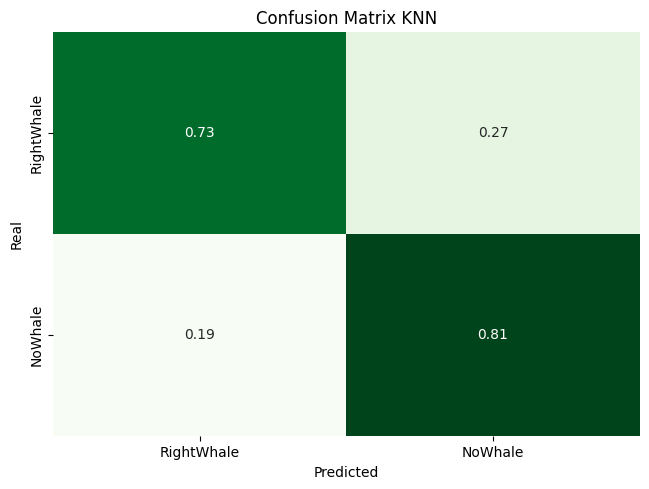

              precision    recall  f1-score   support

           0       0.79      0.73      0.76      1096
           1       0.75      0.81      0.78      1091

    accuracy                           0.77      2187
   macro avg       0.77      0.77      0.77      2187
weighted avg       0.77      0.77      0.77      2187



In [20]:
k = 10
Y_predictions = testing_knn(X_train, y_train, X_test, k)

matriz_confusion(y_test, Y_predictions, "KNN")
report = classification_report(y_test, Y_predictions, target_names=['0', '1'])
print(report)

In [ ]:
k = 30
Y_predict_kaggle = testing_knn(data_train, labels_train.flatten(), data_test_kaggle, k)

In [ ]:
import csv

nombre_archivo = 'KNN.csv'

with open(nombre_archivo, 'w', newline='') as csvfile:
    fieldnames = ['idx', 'class']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

    writer.writeheader()

    for idx, clase in enumerate(Y_predict_kaggle):
        if clase == 1:
            clase_str = 'RightWhale'
        else:
            clase_str = 'NoWhale'

        writer.writerow({'idx': idx, 'class': clase_str})

print(f"Archivo CSV '{nombre_archivo}' creado exitosamente.")

Archivo CSV 'KNN.csv' creado exitosamente.
